Arturo del Cerro Vergara. Deterministic Optimization Algorithm.

In [346]:
import numpy as  np
from math import sqrt
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot

In [347]:
x0 = [  [ -1.5 ]  ,  [ -1 ] ]

In [348]:
def matrix_sum(A,B):
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        return "the matrix dimensions do not coincide"
    result =  [[ 0 for i in range(len(A[0])) ]  for j in range(len(A))] 
    for i in range(len(A)):    
        for j in range(len(A[0])): 
            result[i][j] = A[i][j] + B[i][j] 
    return result  

In [349]:
def substract(A,B):
    if len(A) != len(B) or len(A[0]) != len(B[0]):
        return "the matrix dimensions do not coincide"
    result =  [[ 0 for i in range(len(A[0])) ]  for j in range(len(A))] 
    for i in range(len(A)):    
        for j in range(len(A[0])): 
            result[i][j] = A[i][j] - B[i][j] 
    return result 

In [350]:
def diagonal(A):
    if len(A[0])!=len(A):
        return "the matrix is not squared"
    res = [ 0 for i in range(len(A)) ] 
    for i in range(len(A)):
        res[i] = A[i][i]
    return res    

In [351]:
def inverse_matrix(A):
    #inverse of a 2x2 matrix
    if len(A) != len(A[0]):
        return "the matrix is not squared"
    det = A[0][0]*A[1][1]-A[1][0]*A[0][1]
    if det == 0:
        return "matrix is not invertible"
    inv = [ [A[1][1]/det , -A[0][1]/det   ], [ -A[1][0]/det , A[0][0]/det ]  ]
    return inv

In [352]:
def multiply(A,B):
    if len(A[0]) != len(B):
        return "error"
    result =  [[ 0 for i in range(len(B[0])) ]  for j in range(len(A))]   
    for i in range(len(A)):  
        for j in range(len(B[0])): 
            for k in range(len(B)): 
                result[i][j] += A[i][k] * B[k][j]  
    return result   

In [353]:
def transpose(A): 
    res = [[ 0 for y in range(len(A)) ]  for x in range(len(A[0]))] 
    for i in range(len(A[0])): 
        for j in range(len(A)): 
            res[i][j] = A[j][i] 
    return res    

In [354]:
def rosenbrock(x):
    f =  100*pow((x[1][0]-pow(x[0][0],2)),2)+pow((1-x[0][0]),2)
    return f

In [355]:
def residuals(x):
    f =  [ [ -(10*(x[1][0]-pow(x[0][0],2)) ) ] ,  [-( 1-x[0][0] ) ]  ]
    return f

In [356]:
def gradient(x):
    g = [  [  2*(200*pow(x[0][0],3)-200*x[0][0]*x[1][0]+x[0][0]-1) ]  , [  200*(x[1][0]-pow(x[0][0],2)) ] ] 
    return g


In [357]:
def jacobian(x):
    j =[  [ -20*x[0][0] , 10  ]  ,  [ -1 , 0 ] ] 
    return j

In [358]:
def p_norm(vector,p=2):
    sum = 0
    if vector[0][0] > 100000:
        return 1
    else:
        for k in range(len(vector[0])):
            sum = sum + abs(pow(vector[0][k],p))
        n = pow(sum,1/p)
    return n

In [359]:
def backtracking(x,iter,tau,rho):
    alpha = 100             
    f = rosenbrock(x)
    gT = transpose(gradient(x))
    d = [[-gT[0][0]],[-gT[0][1]]]  #d is steepest descent direction
    t = -rho*multiply(gT,d)[0][0]   
    while rosenbrock(x)-rosenbrock( matrix_sum( x , [[alpha*i[0]] for i in d] ) )  <  alpha*t:
        alpha = tau*alpha          #actualize alpha by a tau step
    return alpha 

In [360]:
def brute_force(x,d):
    alpha = 2.5
    res = 1
    for k in range(0,25000):
        res = k*0.0001
        if rosenbrock(matrix_sum(x, [[res*i[0]] for i in d] )) < rosenbrock(matrix_sum(x, [[alpha*i[0]] for i in d] )):
            alpha = k*0.0001
    return alpha        

Conjugate Gradient Descent Algorithm

In [361]:
def ncg(x0,max_iter,epsilon,method,tau,rho,beta_option = True):
    start = time.time()
    x = x0
    track_x = [x]
    f = rosenbrock(x)
    g = gradient(x)
    d = [[-g[0][0]],[-g[1][0]]] #steepest descent direction
    #alpha = 100 #init alpha to some value
    iter = 0

    while p_norm(g) > epsilon and iter < max_iter:
        alpha = brute_force(x,d) #for exact line search
        #alpha = backtracking(x,iter, tau, rho) #for backtracking
        x = matrix_sum(x, [[alpha*i[0]] for i in d]  )
        g1 = gradient(x)
        if method == "Fletcher-Reeves":
            if iter % 2 == 0:
                beta = 0
            else:     
                beta = multiply(transpose(g1),g1)[0][0]  / multiply( transpose(g),g)[0][0] 
        elif method == "Polak-Ribiere":  
            beta = multiply(transpose(g1), substract(g1,g))[0][0] / multiply(transpose(g),g)[0][0]
        elif method == "Hestenes-Stiefel":
            beta = multiply( transpose(g1), substract(g1,g) )[0][0] / multiply( transpose(d), substract(g1,g))[0][0]
        elif method == "Dai–Yuan":   
            beta = multiply( transpose(g1),g1 )[0][0] / multiply( transpose(d), substract(g1,g))[0][0]
            
        g = g1  
        if beta_option == True and beta < 0: #In some methods this ensure convergence in more cases
            beta = 0 
        d = matrix_sum( [[-g[0][0]],[-g[1][0]]] ,  [[beta*i[0]] for i in d]  )
        iter = iter +1
        track_x.append(x)
    end = time.time()
    print("Time elapsed:" , end-start)
    print("Number of iterations:", iter)
    print("Algorithm has converged to the point",(x[0][0],x[1][0]))
    return track_x 


In [362]:
FR = ncg(x0,10000,1.e-4, "Fletcher-Reeves",0.2, 0.2 ,True);
x_FR = [FR[j][0] for j in range(len(FR))]
y_FR = [FR[j][1] for j in range(len(FR))]

Time elapsed: 11.315802097320557
Number of iterations: 28
Algorithm has converged to the point (0.9997486964192004, 0.999496442360953)


In [363]:
PR = ncg(x0,1000000,1.e-4, "Polak-Ribiere",tau = 0.2,rho=0.2, beta_option = True);
x_PR = [PR[j][0] for j in range(len(PR))]
y_PR = [PR[j][1] for j in range(len(PR))]

Time elapsed: 6.704731225967407
Number of iterations: 14
Algorithm has converged to the point (1.000658574252295, 1.001321002870005)


In [364]:
HS = ncg(x0,1000000,1.e-4, "Hestenes-Stiefel", 0.2, 0.1,  True);
x_HS = [HS[j][0] for j in range(len(HS))]
y_HS = [HS[j][1] for j in range(len(HS))]

Time elapsed: 5.340420961380005
Number of iterations: 13
Algorithm has converged to the point (1.0000508869887001, 1.0001020005739365)


In [365]:
DY = ncg(x0,1000000,1.e-4, "Dai–Yuan", 0.01, 0.01,  True);
x_DY = [DY[j][0] for j in range(len(DY))]
y_DY = [DY[j][1] for j in range(len(DY))]

Time elapsed: 5.633498907089233
Number of iterations: 12
Algorithm has converged to the point (1.0000665505528505, 1.0001335494888495)


Levenberg Marquardt Algorithm

In [366]:
def LM(x0,a,b, epsilon, max_iter=1000):
    start = time.time()
    track_x = []
    iter = 0;
    x = x0;
    J = jacobian(x)
    JT = transpose(J)
    mu = max(diagonal( multiply( JT,J  )))
    
    while iter <= max_iter and sqrt((x[0][0]-1)**2+(x[1][0]-1)**2) > epsilon:
        J = jacobian(x)
        JT = transpose(J)
        JT_J =  multiply( JT,J  )
        
        r = residuals(x)       
        #I = [[mu,0],[0,mu]] for Levenberg algorithm
        I = [[mu*JT_J[0][0],0],[0,mu*JT_J[1][1]]] #for Levenberg-Marquardt algorithm
        g = matrix_sum(JT_J,I)
        grad_C = multiply(JT,r)
        C = r[0][0]**2 + r[1][0]**2
        inv_g = inverse_matrix(g)
        xnew = matrix_sum(x,multiply(inv_g,grad_C))
        rnew = residuals(xnew)
        Cnew = rnew[0][0]**2 + rnew[1][0]**2
        if Cnew < C:
            x = xnew
            r = rnew
            mu = mu/a
        else:
            mu = mu*b
        track_x.append(x)    
        iter = iter +1
    print("Number of iters = ", iter)
    print("Algorithm converged to",(x[0][0],x[1][0]))
    end = time.time()
    print("Time elapsed:" , end-start)
    return (track_x)   

In [367]:
lev = LM(x0,4,6,0)
x1 = [lev[j][0] for j in range(len(lev))]
y1 = [lev[j][1] for j in range(len(lev))]

Number of iters =  29
Algorithm converged to (1.0, 1.0)
Time elapsed: 0.0019919872283935547


In [368]:
lev = LM(x0,2,2,0)
x2 = [lev[j][0] for j in range(len(lev))]
y2 = [lev[j][1] for j in range(len(lev))]

Number of iters =  50
Algorithm converged to (1.0, 1.0)
Time elapsed: 0.005984306335449219


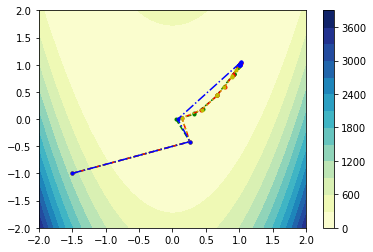

In [369]:
s = 0.005  # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-2, 2.+s, s)   #Could use linspace instead if dividing
Y = np.arange(-2, 2.+s, s)   #evenly instead of stepping...

X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 100.*(Y-X*X)**2

plot.contourf(X, Y, Z, 12, cmap='YlGnBu')
plot.colorbar();

plot.plot(x_FR,y_FR, '--g.')
plot.plot(x_PR,y_PR, '--r.')
plot.plot(x_HS,y_HS, ':y.')
plot.plot(x_DY,y_DY, '-.b.')

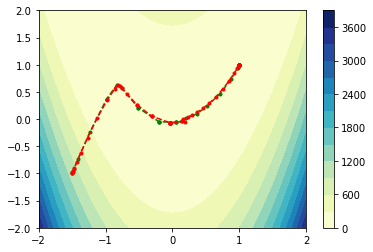

In [370]:
s = 0.05   
X = np.arange(-2, 2.+s, s)   
Y = np.arange(-2, 2.+s, s)   

X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 100.*(Y-X*X)**2

plot.contourf(X, Y, Z, 12, cmap='YlGnBu')
plot.colorbar();

plot.plot(x1,y1, '--g.')
plot.plot(x2,y2, '--r.')


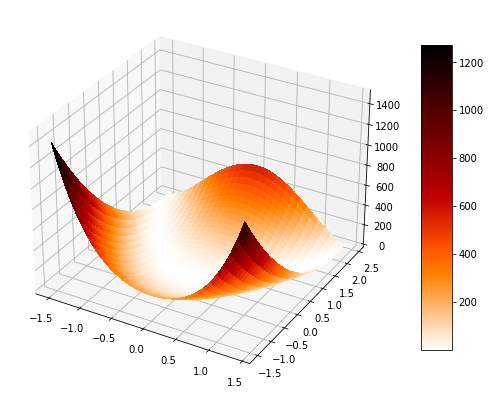

In [2]:
b = 100;
f = lambda x,y: (x-1)**2 + b*(y-x**2)**2;

# Initialize figure 
figRos = plot.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')

# Evaluate function
X = np.arange(-1.5, 1.5, 0.1)
Y = np.arange(-1.5, 2.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 1500)
figRos.colorbar(surf, shrink=0.8, aspect=10)
plot.show()

